In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from time import sleep

%matplotlib inline

In [2]:
k = 4 # кол-во кластеров
n_cl = 50 # размеры кластеров
size_x = size_y = 1 # размер области

In [5]:
# нагенирируем тестовых данных типа ирисов

# левый нижний кластер
x0 = np.random.rand(n_cl) * 0.2 + 0.1
y0 = np.random.rand(n_cl) * 0.3 + 0.1

# правый верхний
x1 = np.random.rand(n_cl) * 0.2 + 0.5
y1 = np.random.rand(n_cl) * 0.5 + 0.5

# левый верхний
x2 = np.random.rand(n_cl) * 0.3
y2 = np.random.rand(n_cl) * 0.3 + 0.7

# правый нижний
x3 = np.random.rand(n_cl) * 0.4 + 0.5
y3 = np.random.rand(n_cl) * 0.2 + 0.1

# добавим шума по вкусу
n_noise = 100
x = np.random.rand(n_noise)
y = np.random.rand(n_noise)

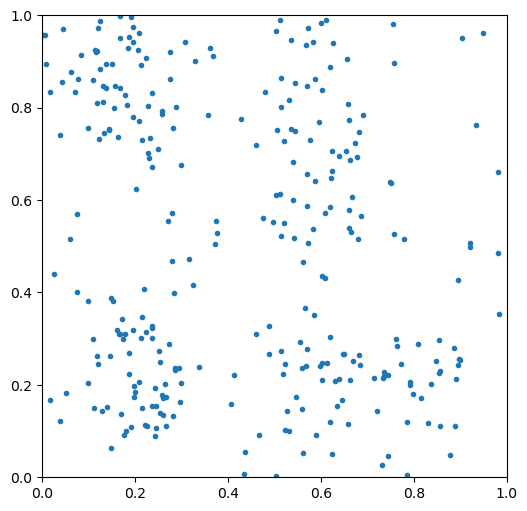

In [6]:
# получаем такой датасет
x = np.concatenate((x, x0, x1, x2, x3))
y = np.concatenate((y, y0, y1, y2, y3))

n = len(x) # общее число точек

plt.rcParams["figure.figsize"] = (6, 6)
plt.axis([0, 1, 0, 1])
plt.plot(x, y, ".")
plt.show()

In [13]:
# для удобства разместим координаты точек в датафрейме
df = pd.DataFrame([x, y], index=["x", "y"]).T
# здесь будем отмечать, к какому кластеру принадлежит точка
df["cluster"] = None

In [14]:
def find_nearest_cluster(df, m):
    r_m = np.zeros((k, n))
    for i in range(k):
        r_m[i] = ((x - m[0, i]) ** 2 + (y - m[1, i]) ** 2) ** 0.5
    df["cluster"] = r_m.argmin(axis=0)
    
def find_mass_center(df):
    df_by_cluster = df.groupby("cluster")
    mx = df_by_cluster.mean()["x"]
    my = df_by_cluster.mean()["y"]
    m = np.array([mx.values, my.values])
    return m

def draw_clusters(df, m):
    plt.axis([0, 1, 0, 1])
    color = iter(plt.cm.tab10(np.linspace(0, 1, k)))
    for i in range(k):
        clr = next(color)
        df_i = df[df["cluster"] == i]
        plt.plot(df_i["x"], df_i["y"], ".", color=clr)
        plt.plot(m[0, i], m[1, i], "+", ms=15, color=clr)
    plt.show()

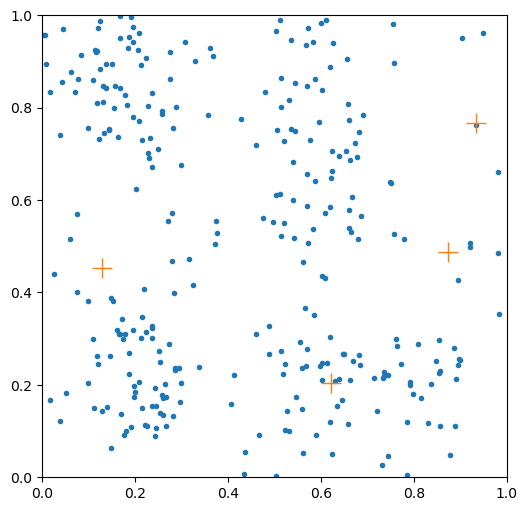

In [15]:
# случайно выберем центры кластеров
m = np.random.rand(2, k)

fig, ax = plt.subplots(1)
plt.plot(x, y, ".")
plt.plot(m[0], m[1], "+", ms=15)
plt.axis([0, 1, 0, 1])
plt.show()

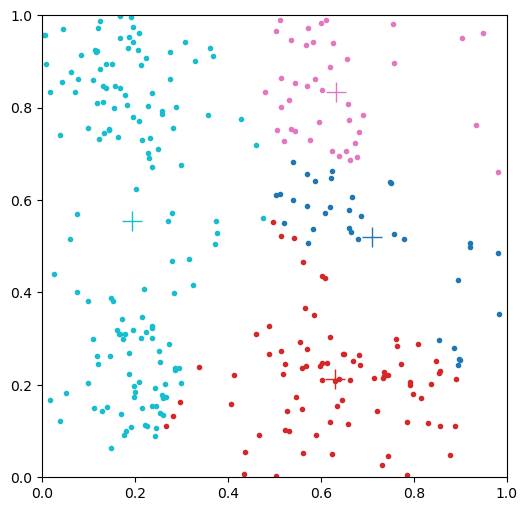

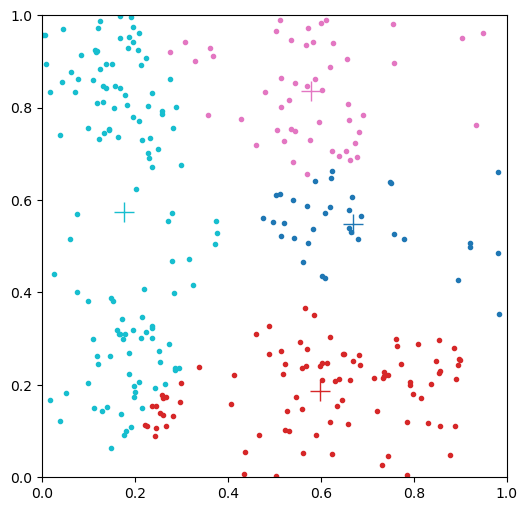

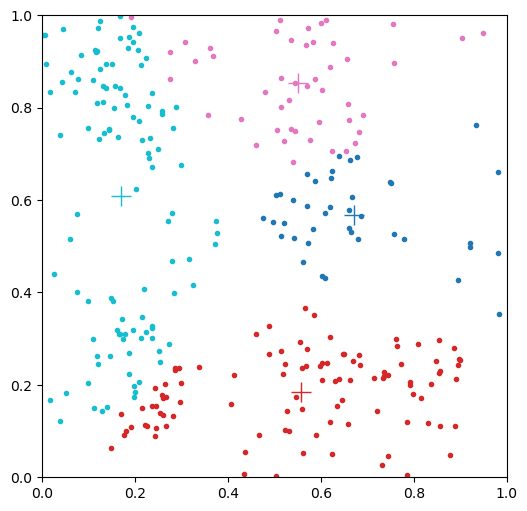

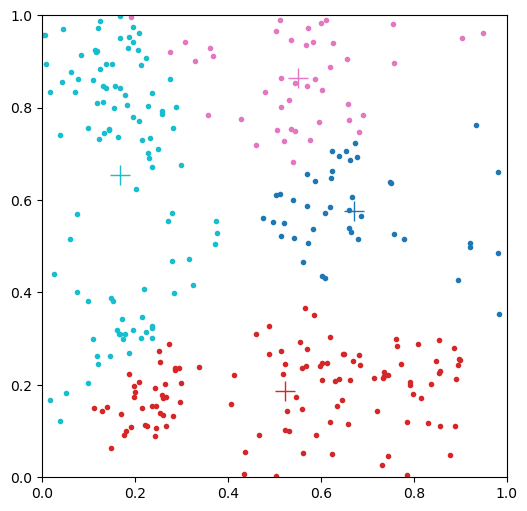

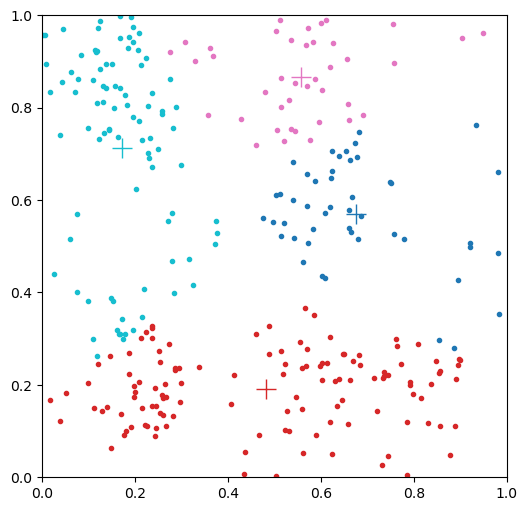

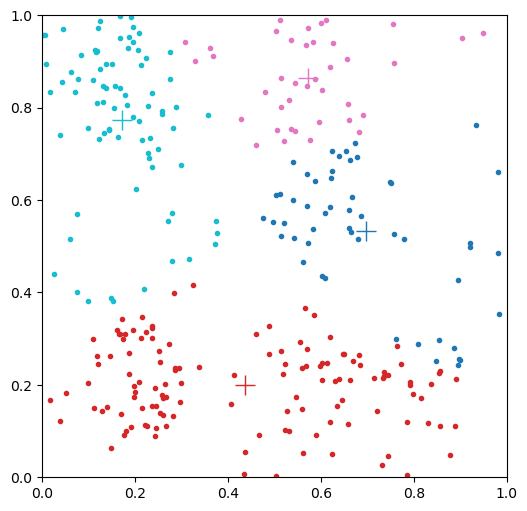

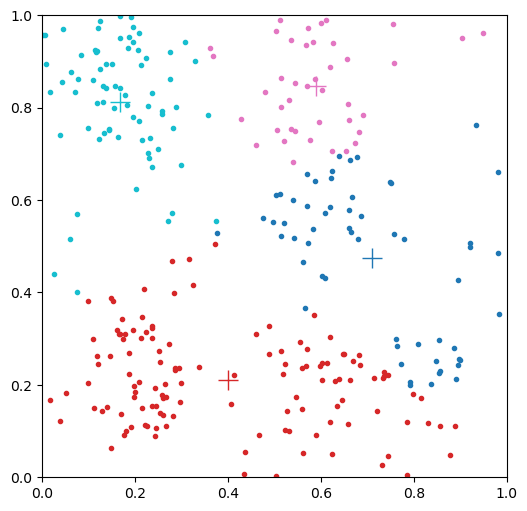

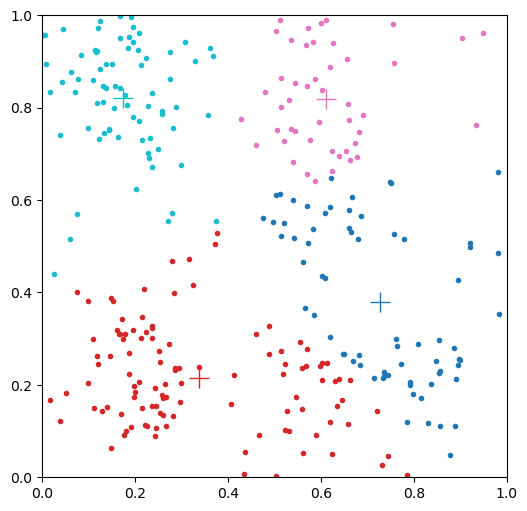

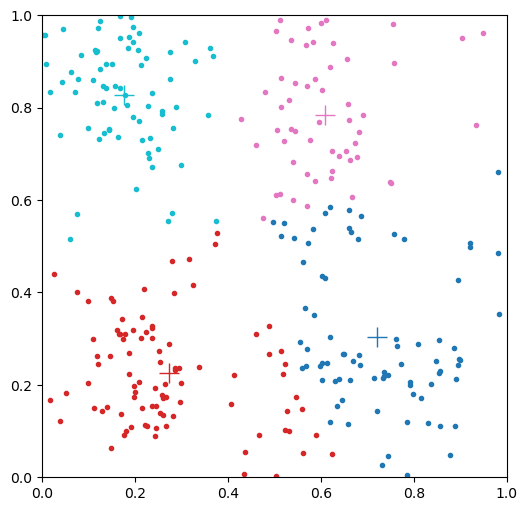

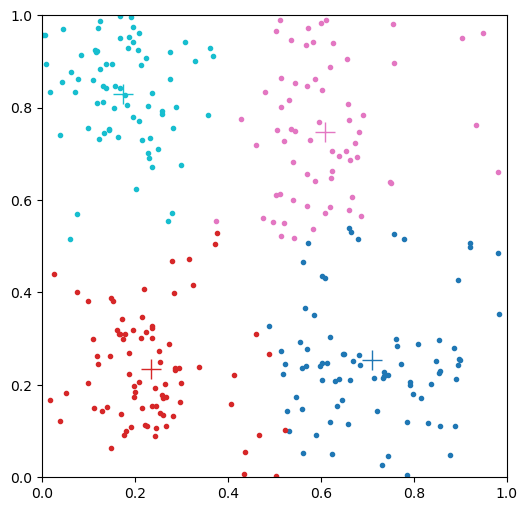

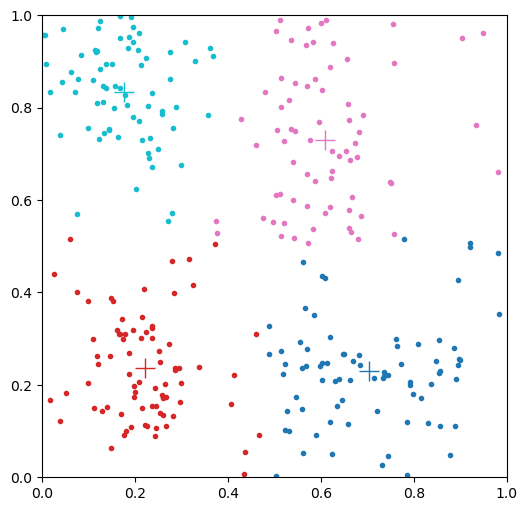

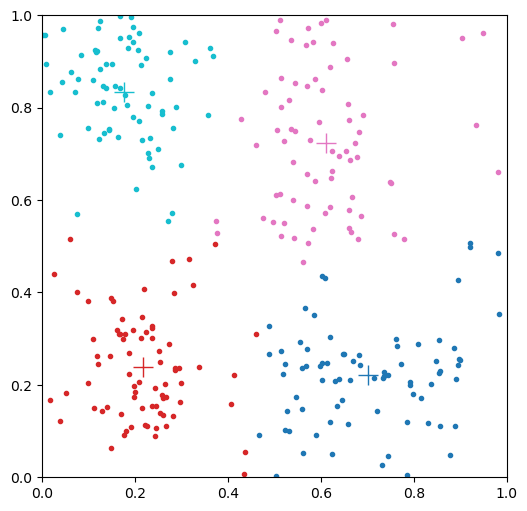

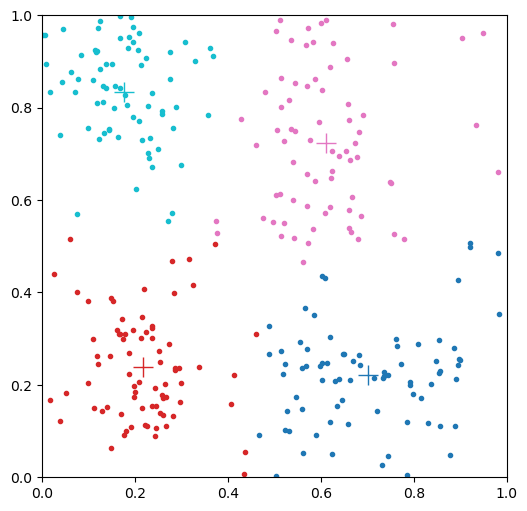

We're Done!


In [16]:
while True:
    old_marks = df["cluster"].copy()
    find_nearest_cluster(df, m)
    m = find_mass_center(df)
    draw_clusters(df, m)
    if (old_marks == df["cluster"]).all():
        print("We're Done!")
        break

Даже явно неоптимальное начальное разбиение быстро привело в итоге к адекватному результату. Круто!